In [2]:
# -*- coding: utf-8 -*-
# Copyright (C) 2018-2019 Helge Stein
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.

import os
from pathlib import Path
import urllib.request as urllib
import h5py
from tqdm import tqdm
import numpy as np

class MaterialsImages():
    def __init__(self):
        self.url = r'https://data.caltech.edu/records/km8xg-1yd31/files/dataset_comp_image_spectra.h5'
        #first check if data is downloaded
        self.dir_path = os.getcwd()
        self.filen = 'dataset_comp_image_spectra.h5'
        filep = Path(os.path.join(self.dir_path,self.filen))
        try:
            self.open_container() #it's there so open it
        except:
            self.download_container() #it's not there so download it
        
        self.images = self.f['images']
        self.spectra = self.f['spectra']
        self.compositions = self.f['atfrac']
        self.loadings = self.f['loadings']
        self.elements = np.array([str(e,'utf-8').split('.PM')[0] for e in self.f['atfrac_keys']])
        
    def download_container(self):
        print('Downloading the dataset ... this might take a while!')
        urllib.urlretrieve(self.url,
                                   os.path.join(self.dir_path,self.filen))
        print('Finished downloading! Opening file ...')
        self.open_container()
    
    def open_container(self):
        self.f = h5py.File(os.path.join(self.dir_path,self.filen), 'r')
    
    def show_datasets(self):
        datasets = [s for s in self.f]
        for dataset in datasets:
            print('Dataset {} contains {} entries with shape {}'.format(
                    dataset,
                    len(self.f[dataset]),
                    self.f[dataset].shape
                    ))

    def get_composition(self,i):
        #returns the composition as a dict
        comp_vec = self.f['atfrac'][:,i]
        return {str(e,'utf-8').split('.PM')[0]:v for v,e in zip(comp_vec,self.f['atfrac_keys']) if v>0}

    def get_composition_string(self,i):
        comp = self.get_composition(i)
        return ''.join([e+str(v) for e,v in comp.items()])

    def get_loading(self,i):
        #returns the loading in nnmol as a dict
        comp_vec = self.f['loadings'][:,i]
        return {str(e,'utf-8').split('.PM')[0]:v for v,e in zip(comp_vec,self.f['loading_keys']) if v>0}
    
    def get_spectrum(self,i):
        return self.f['spectra'][i,:]
    
    def get_image(self,i):
        return self.f['images'][i,:,:,:]
    
    def load_all_spectra_to_memory(self):
        self.spectra = np.zeros(self.f['spectra'].shape)
        self.energy_ev = np.array(self.f['energy_eV'])
        #this is a trick to speed up reading in very large data arrays
        for j in tqdm(range(len(self.energy_ev))):
            self.spectra[:,j] = self.f['spectra'][:,j]

    def load_all_compositions_to_memory(self):
        self.compositions = np.zeros(self.f['atfrac'].shape)
        #this is a trick to speed up reading in very large data arrays
        for j in tqdm(range(42)):
            self.compositions[j,:] = self.f['atfrac'][j,:]
    
    def load_all_images_to_memory(self):
        self.images = np.zeros(self.f['images'].shape)
        #this takes a while ... suggestions welcome
        for j in tqdm(range(64)):
            self.images[:,j,:,:] = self.f['images'][:,j,:,:]
            
    def get_indices_unique_compositions(self):
        uc,ix,inv = np.unique(self.compositions, 
                                 return_index=True, 
                                 return_inverse=True,
                                 axis=1)
        self.unique_compositions = uc
        self.uni_compositions_index = ix
        self.unique_compositions_reconstruction_index = inv
    
    def get_duplicate_plates(self):
        #TODO
        self.plates = np.unique(self.f['plate_id'])
    
    def get_index_composition_space(self,elements):
        #todo
        pass
    
    def citation(self):
        print('When using this data please cite: doi.org/10.1038/s41597-019-0019-4')


ModuleNotFoundError: No module named 'tqdm'

In [ ]:
m = MaterialsImages()
m.show_datasets()
m.get_spectrum(340)


Finished downloading! Opening file ...
Dataset atfrac contains 42 entries with shape (42, 180902)
Dataset atfrac_keys contains 42 entries with shape (42,)
Dataset energy_eV contains 220 entries with shape (220,)
Dataset images contains 180902 entries with shape (180902, 64, 64, 3)
Dataset loading_keys contains 43 entries with shape (43,)
Dataset loadings contains 43 entries with shape (43, 180902)
Dataset plate_id contains 180902 entries with shape (180902,)
Dataset sample_id contains 180902 entries with shape (180902,)
Dataset spectra contains 180902 entries with shape (180902, 220)


TypeError: cannot unpack non-iterable NoneType object

In [8]:
m.load_all_spectra_to_memory()

100%|██████████| 220/220 [00:08<00:00, 26.17it/s]


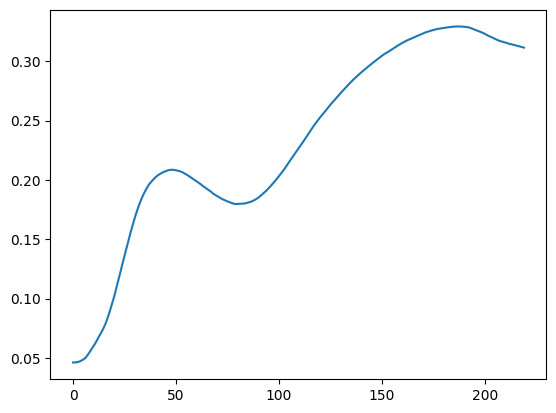

In [9]:
plt.plot(m.get_spectrum(5678))

(180902,)


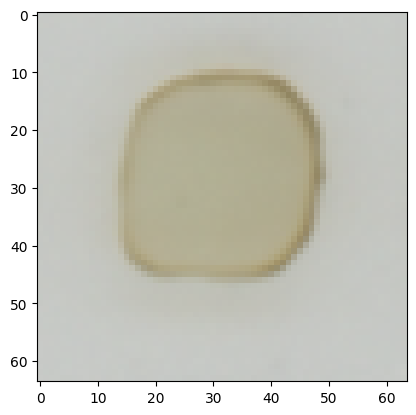

In [13]:
#ich hätte gerne das bild mit dem geringsten absortionskoeffizient (dem wert bei spectra) am spektrumindex 145

alle_spektren = m.spectra[:,145]
print(alle_spektren.shape)
ix = np.argmin(alle_spektren)

plt.imshow(m.get_image(ix))

(180902,)


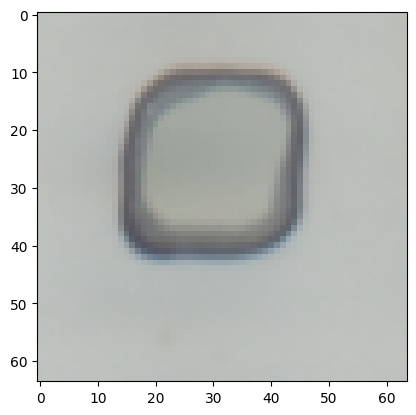

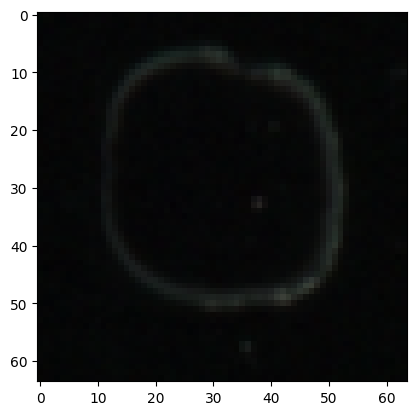

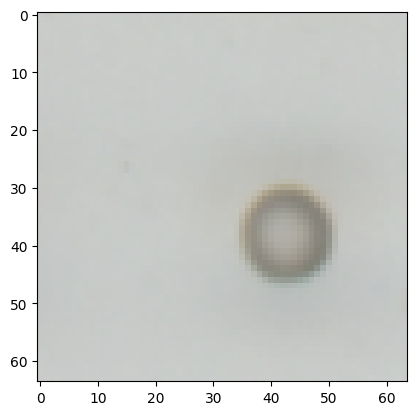

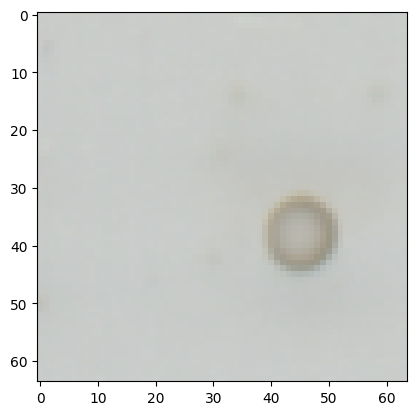

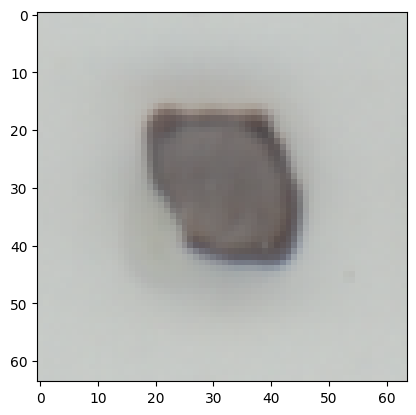

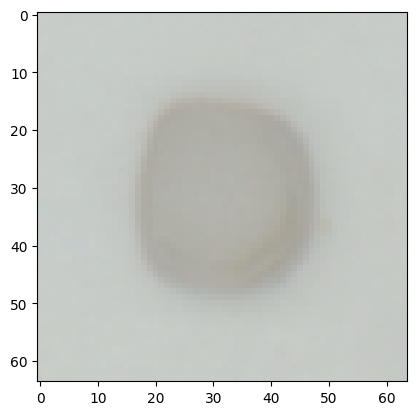

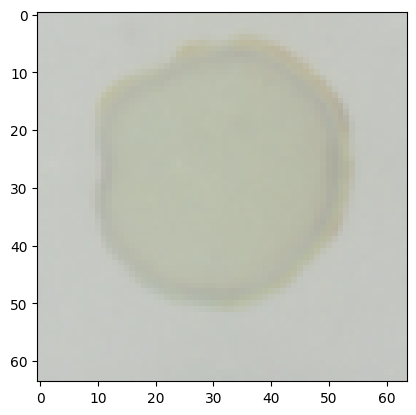

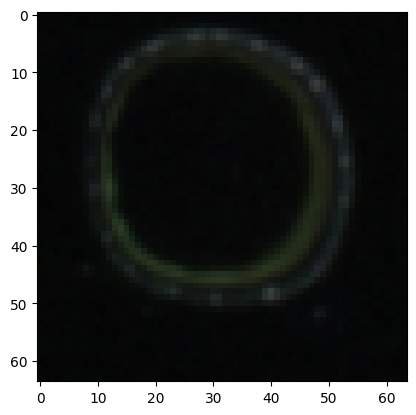

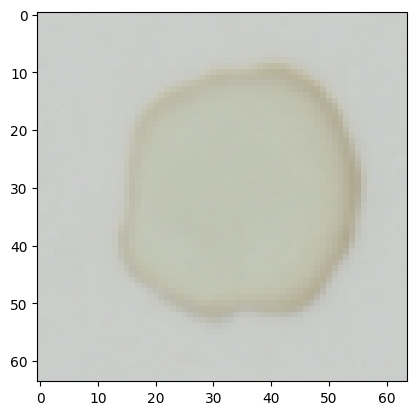

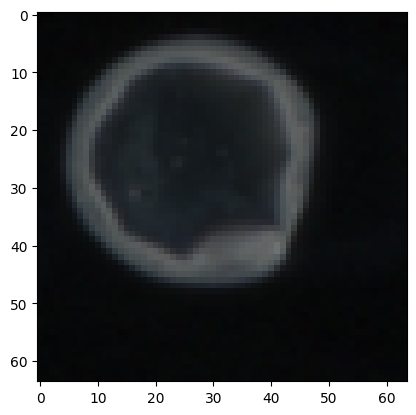

In [15]:
#ich hätte gerne das bild mit dem 10 höchsten absortionskoeffizient (dem wert bei spectra) am spektrumindex 145

alle_spektren = m.spectra[:,145]
print(alle_spektren.shape)
ix = np.argsort(alle_spektren)[-10:]
for i in ix:
    plt.figure()
    plt.imshow(m.get_image(i))

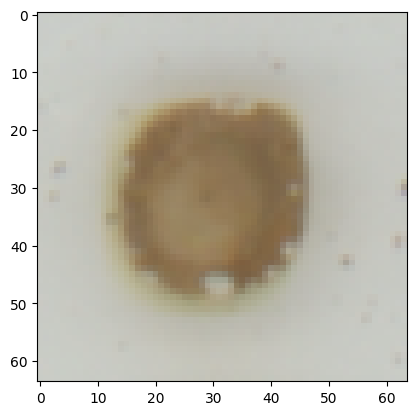

In [ ]:
plt.imshow(m.get_image(567))